<a href="https://colab.research.google.com/github/nileshmalode11/Machine-Learning/blob/main/zomato_rating_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py 
import matplotlib.ticker as mtick
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


Load Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/zomato.csv.zip')

In [ ]:
df.head()

,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,Jalsa,1,1,4.1,775,080 42297555\r\n+91 9743772233,1,20,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",1382,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",5004,Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787,080 41714161,1,20,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",592,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",5004,Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918,+91 9663487993,1,16,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",482,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",5004,Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,+91 9620009302,1,62,Masala Dosa,1583,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",5004,Buffet,Banashankari
4,Grand Village,0,0,3.8,166,+91 8026612447\r\n+91 9901210005,4,20,"Panipuri, Gol Gappe",1402,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",5004,Buffet,Banashankari


In [ ]:
df.shape

(51717, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [ ]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [ ]:
df.drop(['url','phone'],axis=1,inplace=True)

In [ ]:
df.duplicated().sum()

43

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(51674, 15)

**Drop null values**

In [ ]:
df.dropna(how ='any',inplace=True)
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

**Reanaming the columns**

In [ ]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [ ]:
df.head()

,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


**Cleaning the dataset**

In [ ]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [ ]:
df['cost']=df['cost'].apply(lambda x: x.replace(',',''))
df['cost']=df['cost'].astype(float)

In [ ]:
print(df['cost'].unique())

print('---'*20)

df.dtypes

[ 800.  300.  600.  700.  550.  500.  450.  650.  400.  750.  200.  850.
 1200.  150.  350.  250. 1500. 1300. 1000.  100.  900. 1100. 1600.  950.
  230. 1700. 1400. 1350. 2200. 2000. 1800. 1900.  180.  330. 2500. 2100.
 3000. 2800. 3400.   40. 1250. 3500. 4000. 2400. 1450. 3200. 6000. 1050.
 4100. 2300.  120. 2600. 5000. 3700. 1650. 2700. 4500.]
------------------------------------------------------------


address          object
name             object
online_order     object
book_table       object
rate             object
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

In [ ]:
#Reading the unique values from rate columns
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
df = df.loc[df.rate !='NEW']

In [ ]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
#Removing /5 from rate

df['rate']=df['rate'].apply(lambda x: x.replace('/5',''))


###**Visualisations**

Most famous resturant chain in banguluru

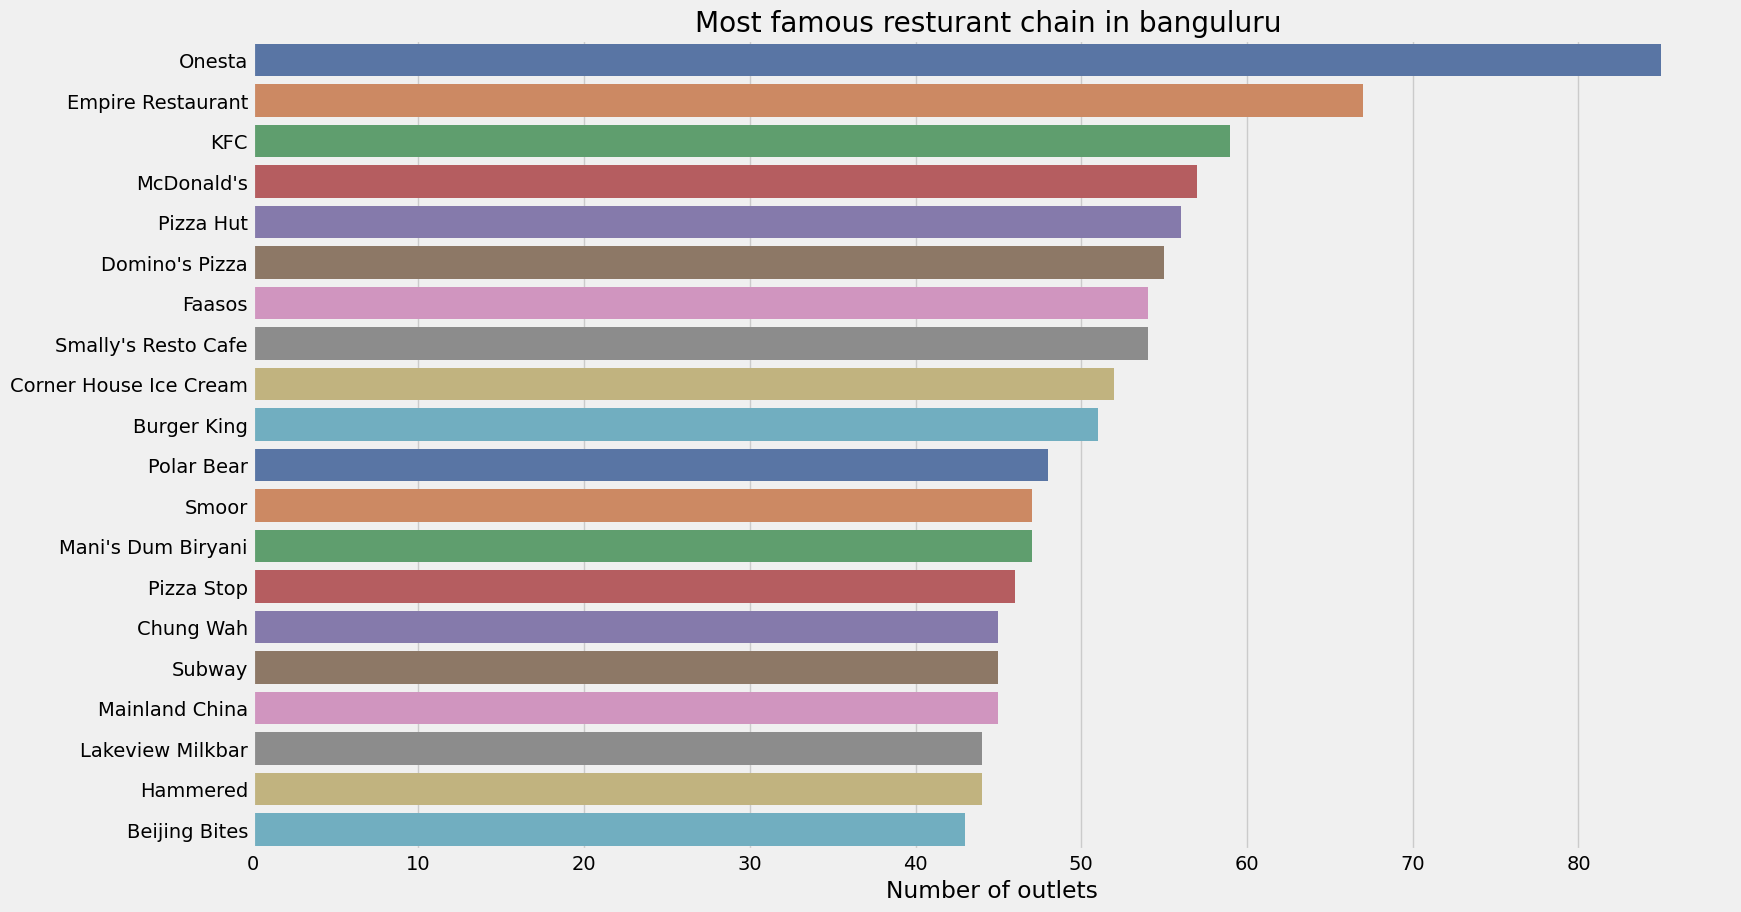

In [ ]:
plt.figure(figsize = (17,10))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains , y = chains.index,palette='deep')
plt.title('Most famous resturant chain in banguluru ')
plt.xlabel('Number of outlets')
plt.show()

In [ ]:
x=df['book_table'].value_counts()
colors=["#800080",'#0000A0']

trace = go.Pie(labels=x.index , values=x , textinfo="value",marker=dict(colors=colors,line=dict(color='#001000',width=2)))

layout=go.Layout(title="Table Booking",width=600,height=600)
fig=go.Figure(data=[trace],layout=layout)
py.iplot(fig,filename='pie_chart_subplots ')

**Whether Resturants deliver online or not**

In [ ]:
# Adjust the column names
df.online_order[df.online_order=='Yes']=1
df.online_order[df.online_order=='No']=0

In [ ]:
df.online_order = pd.to_numeric(df.online_order)

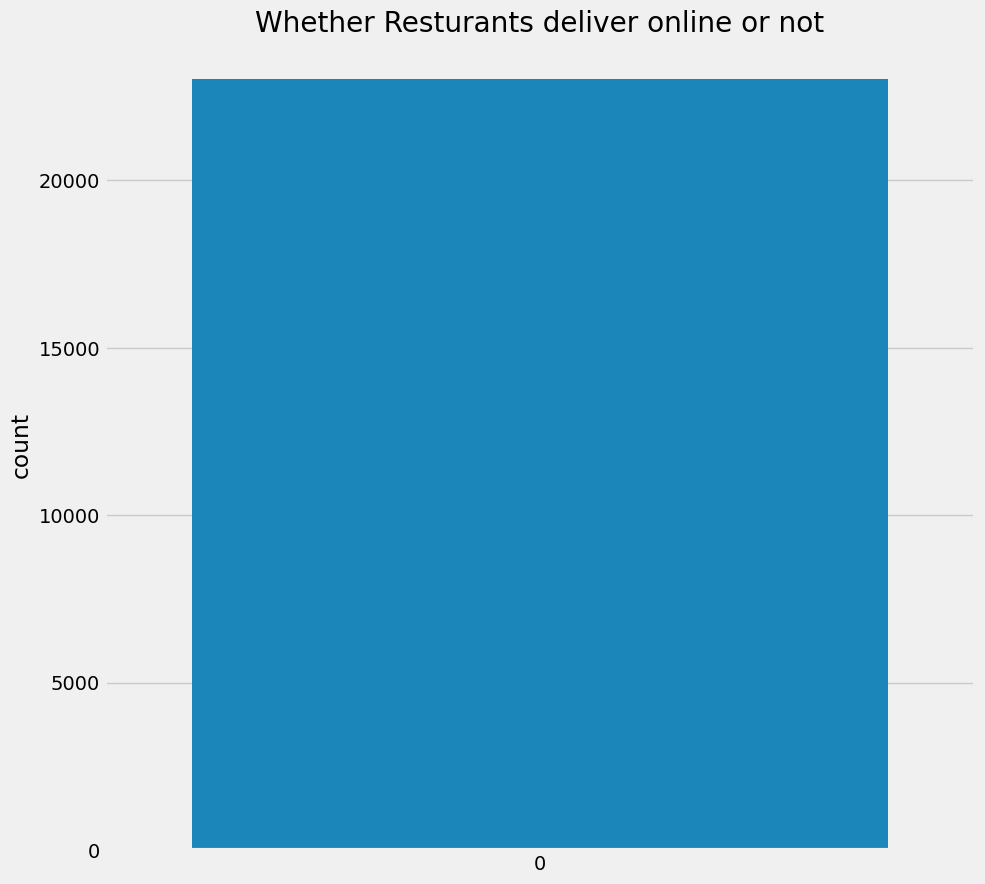

In [ ]:
sns.countplot(df['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Whether Resturants deliver online or not')
plt.show()

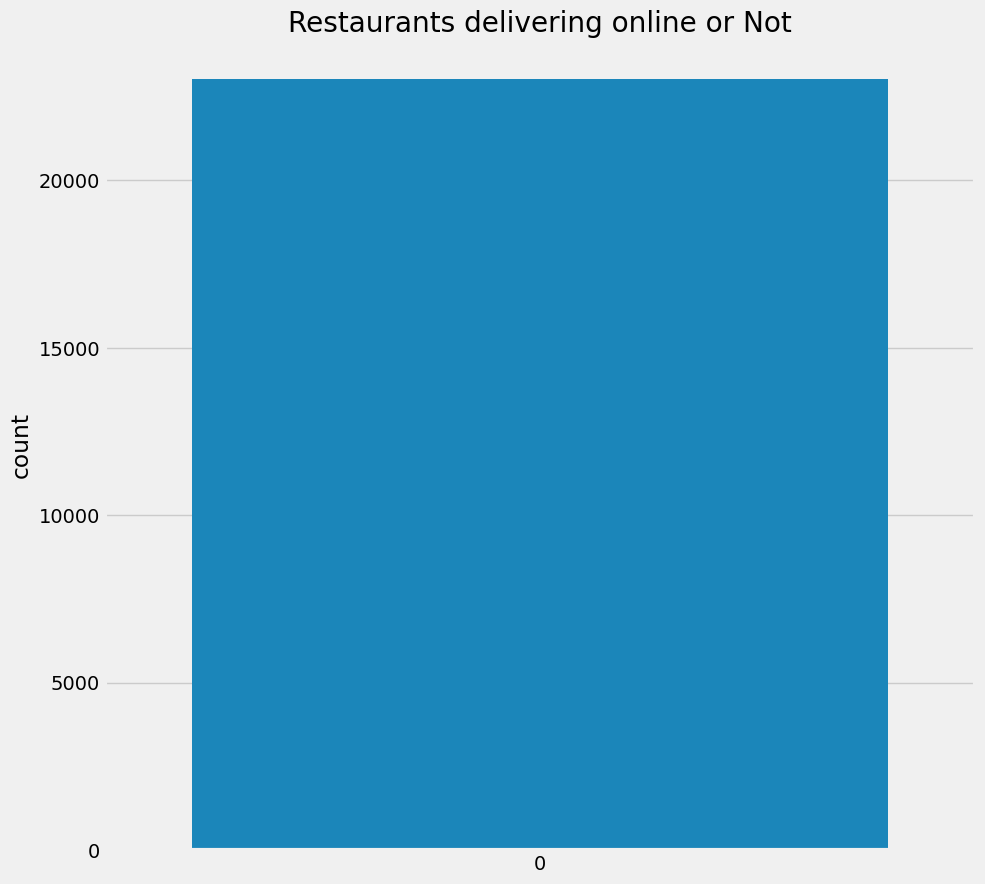

In [ ]:
#Restaurants delivering Online or not
sns.countplot(df['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')
plt.savefig("online.png")

**Rating Distribution**

<Axes: xlabel='rate', ylabel='Density'>

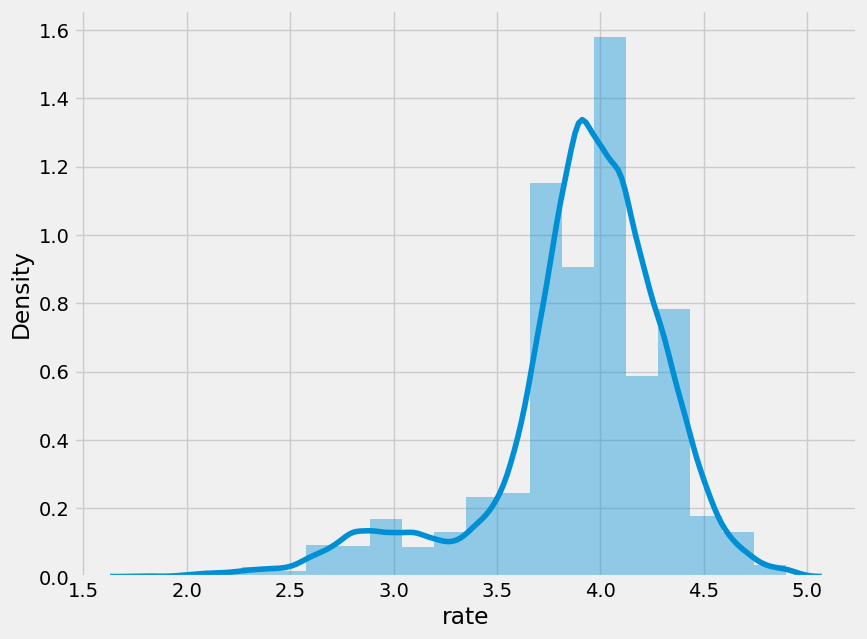

In [ ]:
plt.figure(figsize=(9,7))
sns.distplot(df['rate'],bins=20)

**Insides**

we can infer from above that most of the rating are within the range 3.5 to 4.5

count rating as between '1 and 2', '2 and 3', '3 and 4'and '4 and 5

In [ ]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [ ]:
df['rate'].min()

'1.8'

In [ ]:
df['rate'].max()

'4.9 '

In [ ]:
df['rate'] = df['rate'].astype(float)

In [ ]:
((df['rate']>=1) & (df['rate']<2)).sum()

5

In [ ]:
((df['rate']>=1) & (df['rate']<2)).sum()

5

In [ ]:
((df['rate']>=2) & (df['rate']<3)).sum()

1169

In [ ]:
((df['rate']>=3) & (df['rate']<4)).sum()

10118

In [ ]:
((df['rate']>=4)).sum()

11744

**Plotting the counts with the help ofpie chart**

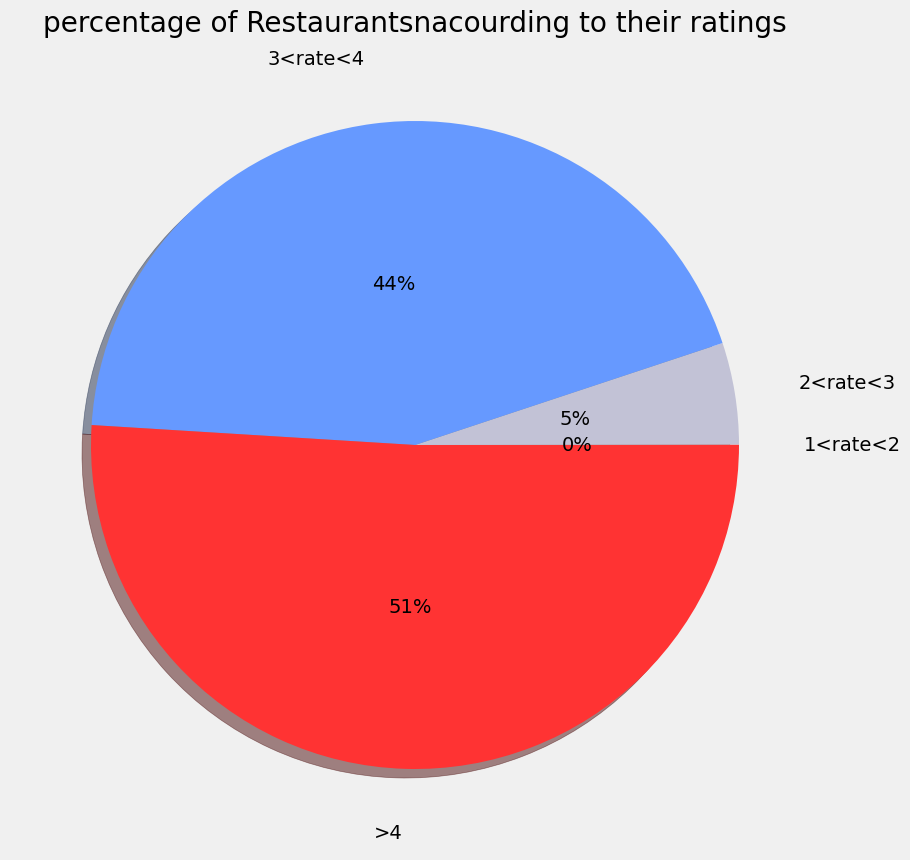

In [ ]:
slices = [((df['rate']>=1) & (df['rate']<2)).sum(),
          ((df['rate']>=2) & (df['rate']<3)).sum(),
          ((df['rate']>=3) & (df['rate']<4)).sum(),
          ((df['rate']>=4)).sum()
          ]
labels = ['1<rate<2','2<rate<3','3<rate<4','>4']
colors = ['#ff3333','#c2c2d6','#6699ff']
plt.pie(slices,colors=colors,labels=labels,autopct='%1.0f%%',pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("percentage of Restaurantsnacourding to their ratings")

fig.set_size_inches(10,10)
plt.show()

**Service Type**

In [ ]:
sns.countplot(df['type']).set_xticklabels(sns.countplot(df['type']).get_xticklabels(),rotation=90,ha='right')
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.title('type of service')

ValueError: ignored

In [ ]:
df.head()

**Distribution of cost of food for two people**

In [ ]:
from plotly.offline import iplot

In [ ]:
trace0 = go.Box(y=df['cost'],name='accepting online order',marker = dict(color='rgb(113,10,100)'))
data=trace0
layout=go.Layout(title='Box plot of approximate cost',width=800,height=800,yaxis=dict(title='Price'))
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)


**Distribution of charges**

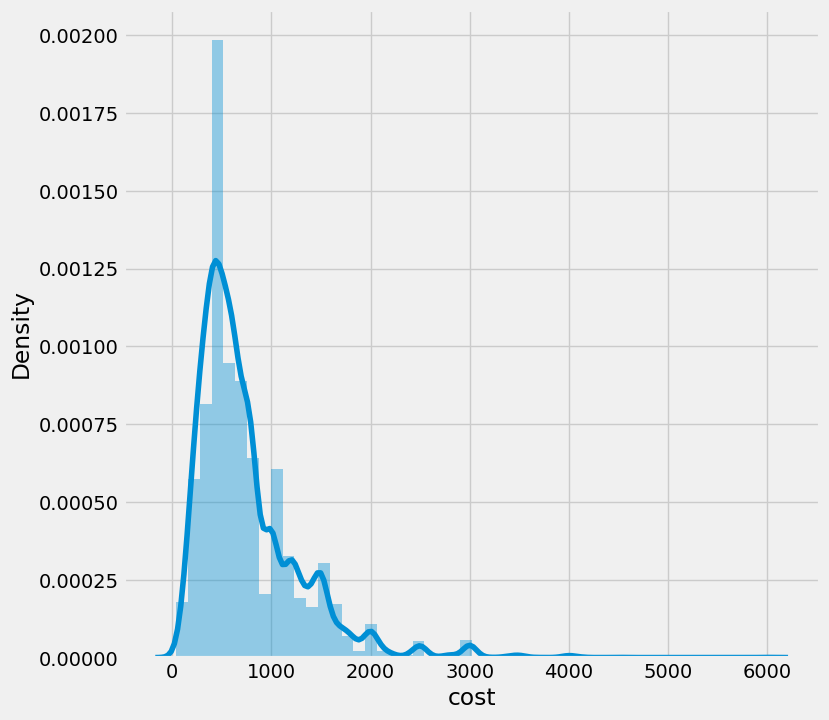

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(df['cost'])
plt.show()

**Most liked dist**

In [ ]:
import re
df.index=range(df.shape[0])
likes=[]
for i in  range(df.shape[0]):
  array_split=re.split(',',df['dish_liked'][i])
  for item in array_split:
    likes.append(item)


In [ ]:
df.index=range(df.shape[0])
df.index

RangeIndex(start=0, stop=23036, step=1)

In [ ]:
print("count of most liked dishes in bangalore")
favourite_food=pd.Series(likes).value_counts()
favourite_food.head(30)

count of most liked dishes in bangalore


 Pasta              2647
 Pizza              1902
 Cocktails          1861
 Burgers            1722
 Mocktails          1585
 Biryani            1307
 Sandwiches         1281
Burgers             1239
 Coffee             1155
 Nachos             1152
 Fish               1114
 Paratha            1096
 Salads             1036
 Chicken Biryani    1002
Cocktails            891
 Fries               874
 Mutton Biryani      832
 Beer                827
 Noodles             821
 Tea                 800
 Sandwich            784
 Butter Chicken      782
Coffee               782
 Thali               770
Biryani              748
Pizza                735
 Roti                721
 Brownie             712
 Salad               677
 Hot Chocolate       667
dtype: int64

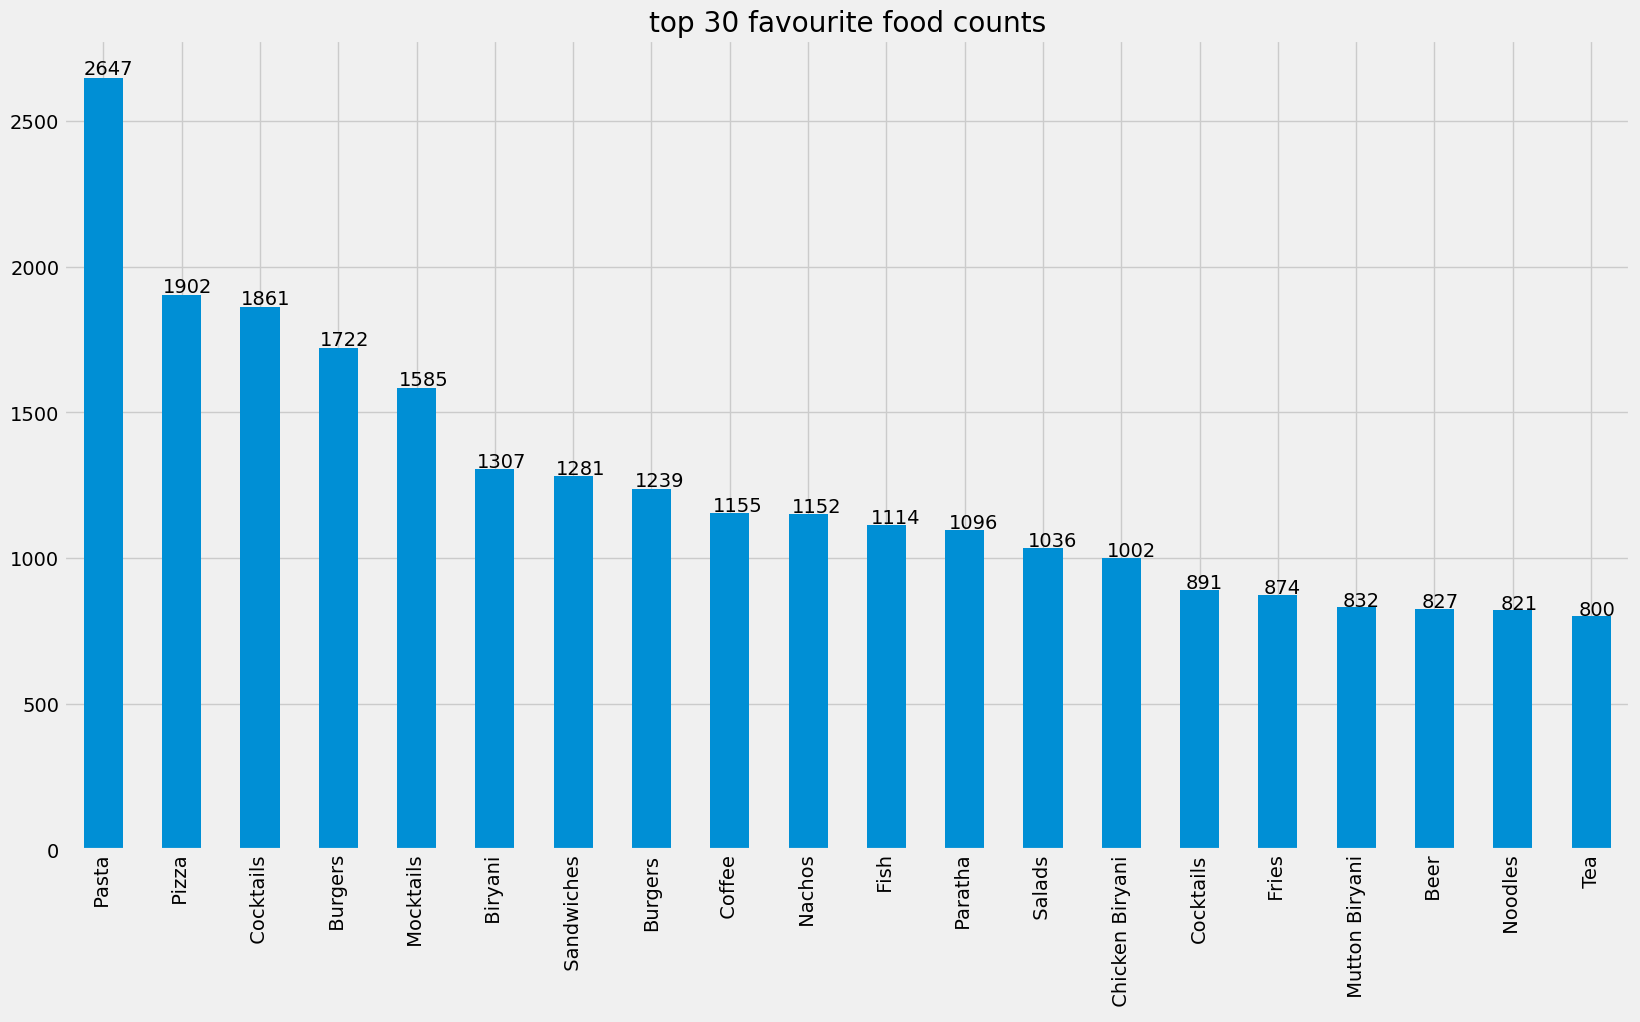

In [ ]:
ax=favourite_food.nlargest(n=20,keep='first').plot(kind='bar',figsize=(18,10),title='top 30 favourite food counts')
for i in ax.patches:
  ax.annotate(str(i.get_height()),(i.get_x()*1.005,i.get_height()*1.005))

We can infer from the analysis is that 5 most likesd dishes are **pasta** **pizza** **cocktails** **Burger** **Mocktails**

**Restaurants and theire counts**

In [ ]:
plt.figure(figsize=(15 , 7))
rest=df['rest_type'].value_counts()[:20]
sns.barplot(rest,rest.index)
plt.title('Restaurant types')
plt.xlabel('count')

TypeError: ignored

<Figure size 1500x700 with 0 Axes>

###**Model Building**

In [ ]:
df.head()

,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,Jalsa,1,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,1,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,1,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,0,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df.online_order.value_counts()

1    16378
0     6870
Name: online_order, dtype: int64

**Change the string categorical into a categorical int**

In [ ]:
# Adjust the column names
df.book_table[df.book_table=='Yes']=1
df.book_table[df.book_table=='No']=0

In [ ]:
df.book_table = pd.to_numeric(df.book_table)

In [ ]:
df.book_table.value_counts()

0    17191
1     6057
Name: book_table, dtype: int64

**Label encoding to the categorical variable**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df.location = le.fit_transform(df.location)
df.rest_type = le.fit_transform(df.rest_type)
df.cuisines = le.fit_transform(df.cuisines)
df.menu_item = le.fit_transform(df.menu_item)

In [ ]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,20,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",1386,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",5047,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,20,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",594,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",5047,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,1,16,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",484,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",5047,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,1,62,Masala Dosa,1587,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",5047,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,4,20,"Panipuri, Gol Gappe",1406,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",5047,Buffet,Banashankari


In [ ]:
my_data= df.iloc[:,[2,3,4,5,6,7,9,10,12]]
my_data.to_csv('zomato_df.csv')

In [ ]:
x=df.iloc[:,[2,3,5,6,7,9,10,12]]
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775,1,20,1386,800.0,5047
1,1,0,787,1,20,594,800.0,5047
2,1,0,918,1,16,484,800.0,5047
3,0,0,88,1,62,1587,300.0,5047
4,0,0,166,4,20,1406,600.0,5047


In [ ]:
y= df['rate']
y

0         4.1
1         4.1
2         3.8
3         3.7
4         3.8
         ... 
51705    3.8 
51707    3.9 
51708    2.8 
51711    2.5 
51715    4.3 
Name: rate, Length: 23248, dtype: object

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3, random_state=10)

###**Linear Regression**

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.22818828522967072

###**DecisionTree**

###**Randome Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Rf = RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
Rf.fit(x_train,y_train)
y_predict = Rf.predict(x_test)
r2_score(y_test,y_predict)

0.8809706960047533

###**ExtraTree Regressor**

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
ET = ExtraTreesRegressor(n_estimators=120)
ET.fit(x_train,y_train)
y_predict1=ET.predict(x_test)

r2_score(y_test,y_predict1)

0.9326716677044998

In [ ]:
import pickle

pickle.dump(ET, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))